In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss

In [2]:
ab_test = pd.read_csv('https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv')
ab_test.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


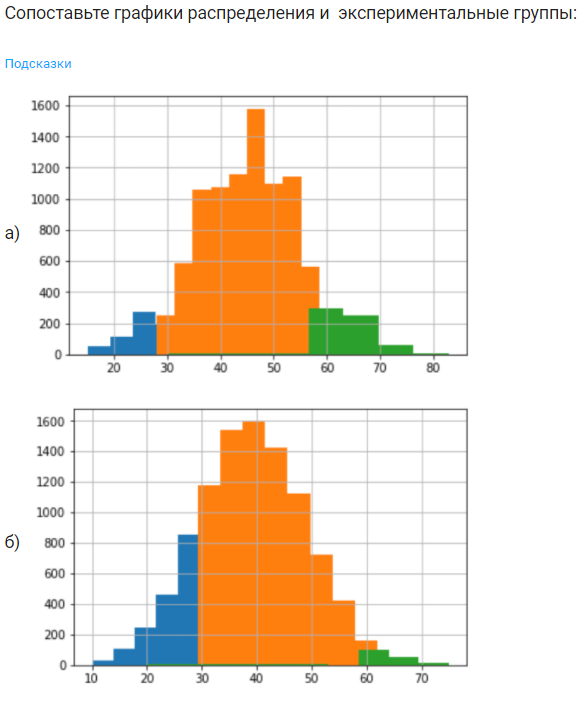

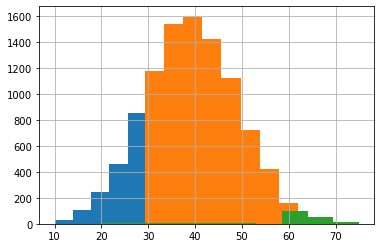

In [5]:
ab_test.query('experiment_group == "test"').groupby('district').delivery_time.hist();

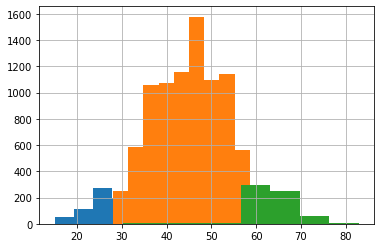

In [6]:
ab_test.query('experiment_group == "control"').groupby('district').delivery_time.hist();

Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [8]:
cnt = ab_test.groupby('experiment_group').order_id.count()
print(cnt[1]-cnt[0])

12


Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

Обязательно сделайте семплирование перед применением критерия при проверке на нормальность (и для теста, и для контроля), так как на больших выборках вы можете получать неверные результаты: 
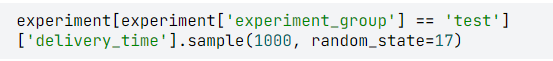

Посчитаем Шапиро-Уилка тест для проверки на нормальность

In [9]:
ss.shapiro(ab_test.query('experiment_group == "control"').delivery_time.sample(1000, random_state = 17))

(0.9974725842475891, 0.12411931157112122)

In [10]:
ss.shapiro(ab_test.query('experiment_group == "test"').delivery_time.sample(1000, random_state = 17))

(0.9975479245185852, 0.14013493061065674)

Посчитаем std

In [12]:
round(ab_test.query('experiment_group == "control"').delivery_time.std(), 2)

9.99

In [13]:
round(ab_test.query('experiment_group == "test"').delivery_time.std(), 2)

9.88

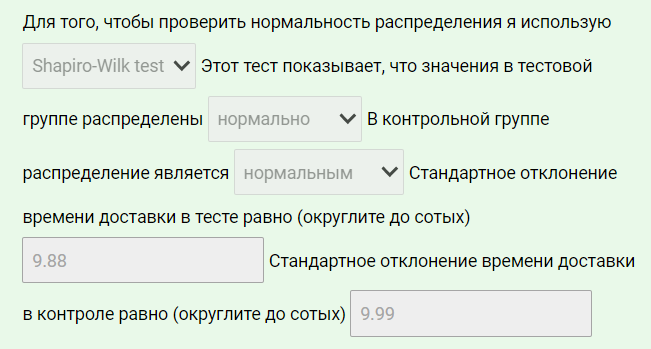

Пришло время сравнить средние в тесте и контроле. Внимание: здесь уже не нужно пользоваться методом .sample() - он нам нужен был только для теста Шапиро-Уилка, остальные тесты надо проводить на полных данных.

In [18]:
ss.ttest_ind(ab_test.query('experiment_group == "test"').delivery_time, \
            ab_test.query('experiment_group == "control"').delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

На сколько процентов изменилось среднее время доставки в тестовой группе (округлите до сотых)? 

In [20]:
test_mean = ab_test.query('experiment_group == "test"').delivery_time.mean()
control_mean = ab_test.query('experiment_group == "control"').delivery_time.mean()

percentage = (test_mean - control_mean) / control_mean *100
round(percentage, 2)

-13.35

Что в итоге? Катим? 

